In [ ]:
!pip install easyocr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 11.8 MB/s eta 0:00:00


In [ ]:
import easyocr  # Import the easyocr library for text detection and recognition
import cv2      # Import OpenCV for image processing
import pandas as pd # Import pandas
import matplotlib.pyplot as plt  # Import Matplotlib for displaying images
import pandas as pd   # Import Pandas for data manipulation
import re    # Import the re module for regular expressions
import warnings   # Import warnings for suppressing warnings


'''
import stanza
stanza.download('en')
nlp = stanza.Pipeline()
'''


# Here Stanza library can be used in the case where we need to extract the person name
# we need to do this  !pip install stanza for installing the stanza and then import stanza libary

"\nimport stanza\nstanza.download('en')\nnlp = stanza.Pipeline()\n"

In [ ]:
# Define a function for Aadhar card detection given an image path
def aadhar_detection(image_path):


  # Initialize the text reader for English
  reader = easyocr.Reader(['en', 'hi'])

  # Read the input image using OpenCV
  image = cv2.imread(image_path)

  # Detect text coordinates in the image
  coord, _ = reader.detect(image)

  # Check if no text coordinates were detected
  if len(coord[0]) == 0:
      return('Please submit a valid Document')


  # Suppress warnings to avoid clutter in output
  warnings.filterwarnings('ignore')




  # Create a copy of the original image for drawing bounding boxes
  image_raw = image.copy()


  # Iterate through the detected text coordinates and draw bounding boxes
  for each_coord in coord[0]:

      x1, x2, y1, y2 = each_coord
      # Draw a bounding box around the detected text
      cv2.rectangle(image_raw, (x1, y1), (x2, y2), color = (255, 0 ,0 ), thickness = 2)

  # Display the image with bounding boxes
  # if you don't want to display the image comment the below two lines@
  plt.figure(figsize = (10,7))
  plt.imshow(image_raw)


  # Create an empty DataFrame to store extraction details
  extraction_dtls = pd.DataFrame()


  # Iterate through the detected text coordinates to extract text and confidence
  for each_coord in coord[0]:
      x1, x2, y1, y2 = each_coord
      crop = image[y1:y2, x1:x2]

      try:
          result = reader.readtext(crop)

          if result:
              extraction_dict = {}  # Create a new dictionary for each iteration
              result = result[0]
              text = result[1]
              conf = round(result[2], 2)
              extraction_dict['Coordinate'] = each_coord
              extraction_dict['Text'] = text
              extraction_dict['Confidence'] = conf
              extraction_dtls = extraction_dtls.append(extraction_dict, ignore_index=True)
      except:
            pass




  # Define patterns for Aadhar card number and date of birth

  doc_type = 'Aadhar Card'
  # Aadhar number pattern which consists of 4 numbers space 4 numbers space and 4 numbers
  # Total 12 numbers
  id_pattern = r'\d{4}\s\d{4}\s\d{4}'

  # Date of Birth pattern which consists two numbers slash two numbers slash and 4 numbers
  dob_pattern = r'\d{2}\/\d{2}\/\d{4}'

  # Initialize lists to store extracted Aadhar card numbers and date of birth
  ID_number = []
  DOB_number = []

  # Extract Aadhar card numbers from the 'Text' column using regular expressions
  for text in extraction_dtls['Text']:
      ID_number.extend(re.findall(id_pattern, text))

  # Extract date of birth from the 'Text' column using regular expressions
  for text in extraction_dtls['Text']:
      DOB_number.extend(re.findall(dob_pattern, text[len(text)-10: ]))






  # Check if date of birth was not extracted
  if len(DOB_number) == 0:
    return ('Please Enter a valid Aadhar card')
  else:
    pass


  # Initialize a variable to check if 'Government of India' is present in the text
  # creating org empty string which we use to check if the Aadhar card consists of the government of India

  org = ''
  for i in extraction_dtls['Text']:
    m_i = i.replace(" ","")
    if m_i.lower() == 'governmentofindia':
        org = m_i.lower()
        break
    else:
        pass

  # Check if 'Government of India' is present and Aadhar card number has 14 digits
  if org == 'governmentofindia' and len(ID_number[0]) == 14:
      final_doc_type = doc_type
  else:
      return('Please input correct Document')



  # Initialize variables to calculate accuracy
  # cd for date of birth
  # cn for the aadhar number
  # cg for Government of India

  cd = 0
  cn = 0
  cg = 0

  # Calculate confidence values for Aadhar card number, date of birth, and 'Government of India'


  for i in range(len(extraction_dtls['Text'])):
    if extraction_dtls['Text'][i] == ID_number[0]:
      cn = extraction_dtls['Confidence'][i]

    else:
      pass

  for i in range(len(extraction_dtls['Text'])):
    if extraction_dtls['Text'][i].replace(" ","").lower() == "governmentofindia":
      cg = extraction_dtls['Confidence'][i]
      break
    else:
      pass

  for i in range(len(extraction_dtls['Text'])):
    if extraction_dtls['Text'][i][len(extraction_dtls['Text'][i])-10: ] == DOB_number[0]:
      cd = extraction_dtls['Confidence'][i]
      break
    else:
      pass

  # Calculate accuracy by giving more weightage to the extracted variales
  accuracy = ((cg*1.25+ cn*1.25 + cd*0.75) / 3 )*100

  # Return the document type and accuracy as a formatted string
  return f'The Document Type is {doc_type}', f'Accuracy: {accuracy:.2f}%'



('The Document Type is Aadhar Card', 'Accuracy: 70.67%')

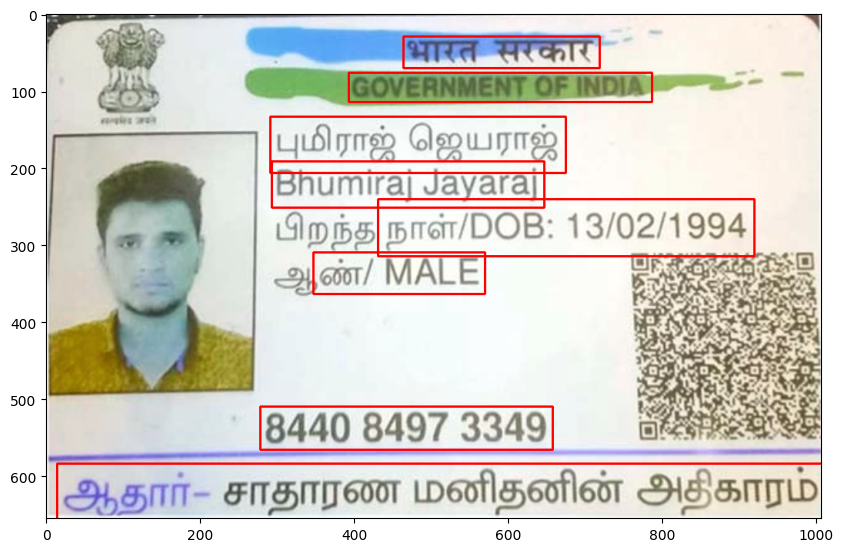

In [ ]:
image_path1 = '/content/aadhar_image_3.png'
aadhar_detection(image_path1)

# when a legit Tamil langugage aadhar is uploaded
# The Model detects it as an Aadhar card and confirms it as an Aadhar card
# Here is the code able to detect an Aadhar card with Tamil language Aadhar card

('The Document Type is Aadhar Card', 'Accuracy: 71.08%')

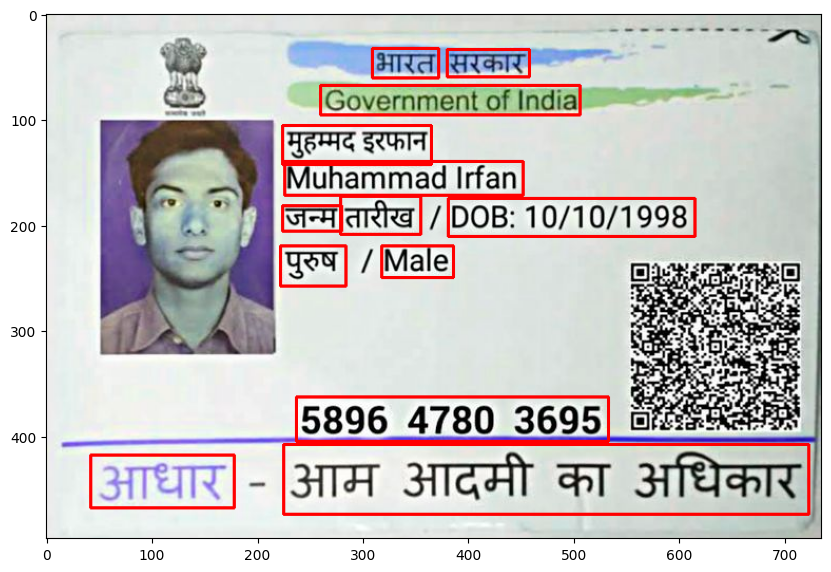

In [ ]:
image_path2 = '/content/aadhar_image_1.jpg'
aadhar_detection(image_path2)


# when a legit Hindi language aadhar is uploaded
# The Model detects it as an Aadhar card and confirms it as an aadhar card
# Here the Model able to detect an aadhar card with Hindi language Aadhar card

('The Document Type is Aadhar Card', 'Accuracy: 63.92%')

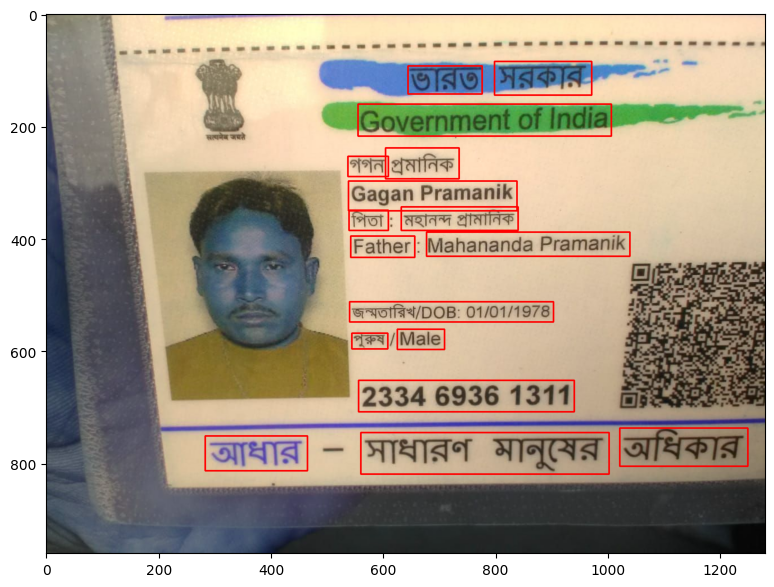

In [ ]:
image_path3 = '/content/aadhar_image_2.jpg'
aadhar_detection(image_path3)

# when a legit Aadhar of other language is also uploaded
# The Model detects it as an Aadhar card and confirms it as an aadhar card
# Here the Model able to detect an aadhar card with other language Aadhar card
# showcasing the flexibility of the Model

In [ ]:
image_path4 = '/content/lady.jpg'
aadhar_detection(image_path4)


# Here we uploaded an image of just a lady
# since no text is detected from the uploaded image
# the model will return back with the message to submit a valid document

'Please submit a valid Document'

'Please input correct Document'

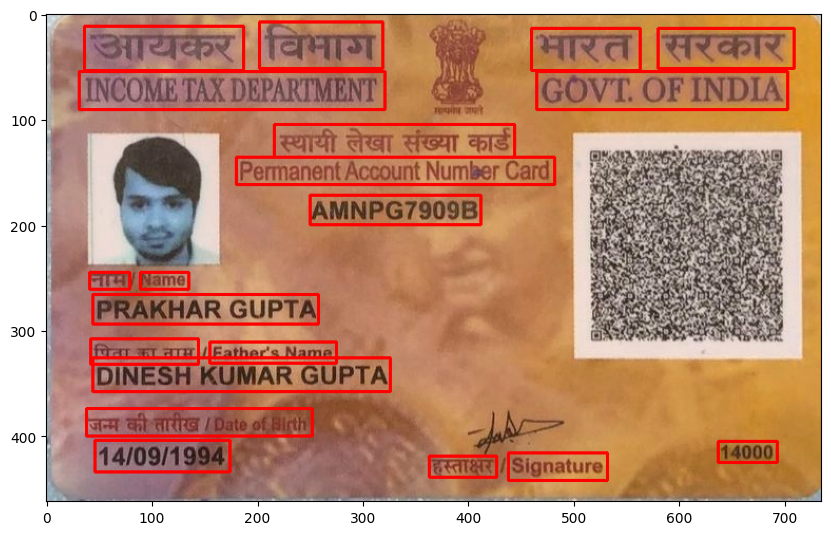

In [ ]:
image_path8 = '/content/pan.jpg'
aadhar_detection(image_path8)


# case where another type of ID is card uploaded
# we have taken a case where PAN card is uploaded
# Due to features that are present in the Aadhar card

'Please Enter a valid Aadhar card'

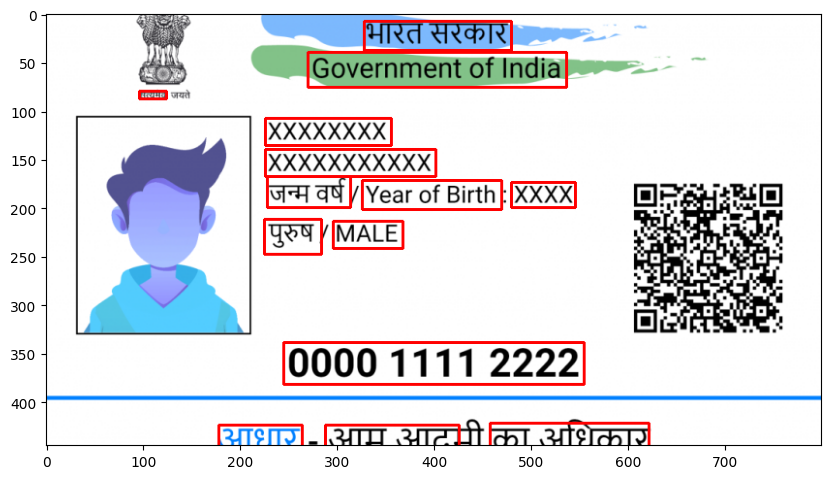

In [ ]:
image_path5 = '/content/sample_aadhar.png'
aadhar_detection(image_path5)


# Case where an Fake aadhar card is uploaded
# Though the ID card format is similar to aadhar card since the details are fake
# The Model is able to detect it as Fake document

('The Document Type is Aadhar Card', 'Accuracy: 74.25%')

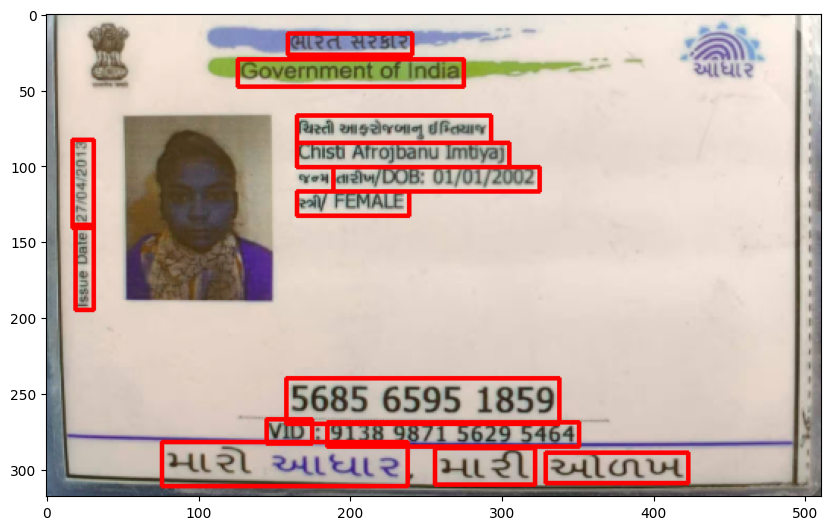

In [ ]:
image_path7 = '/content/test.png'
aadhar_detection(image_path7)

# Legit aadhar card is uploaded case